In [7]:
import numpy as np
import pylab as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as sps
import pandas as pd

# Задание 1

In [3]:
def lkm(x):
    x = (31*x+1) % 1000 # 2^32 = 4294967296
    return int(x)

# Задание 2

<img src="формула.png">

In [4]:
def generation_num(arr_num_values):
    sales = {}
    for i, N in enumerate(arr_num_values):
        x = 1
        values = []
        for _ in range(N):
            #result = (0 + (10-0)*lkm())/4294967296
            result = lkm(x)/1000
            x = lkm(x)
            values.append(result)
        title_stb = "Выборка №{}".format(i+1)
        sales[title_stb] = pd.Series(values)
    return pd.DataFrame(data=sales)

In [5]:
df = generation_num([10])

In [6]:
df

,Выборка №1
0,0.032
1,0.993
2,0.784
3,0.305
4,0.456
5,0.137
6,0.248
7,0.689
8,0.360
9,0.161


In [5]:
df.head()

,Выборка №1,Выборка №2,Выборка №3,Выборка №4
0,0.052842,0.052842,0.052842,0.052842
1,5.019935,5.019935,5.019935,5.019935
2,6.675799,6.675799,6.675799,6.675799
3,0.166437,0.166437,0.166437,0.166437
4,6.778651,6.778651,6.778651,6.778651


# Задание 3

In [6]:
arr_mean = df.mean()
arr_dispersion = df.std()**2
theor_mean = (0+10)/2
theor_dispersion = (10-0)**2/12

In [7]:
print("Математическое ожидание:\n{}\n\nДисперсия:\n{}".format(arr_mean, arr_dispersion))

Математическое ожидание:
Выборка №1    4.844687
Выборка №2    5.082844
Выборка №3    4.997016
Выборка №4    4.992300
dtype: float64

Дисперсия:
Выборка №1    8.186038
Выборка №2    8.127649
Выборка №3    8.308054
Выборка №4    8.344334
dtype: float64


In [8]:
print("Математическое ожидание и дисперсия \
теоретической равномерно распределенной случайной величиной:\n{}\n{}".format(theor_mean, theor_dispersion))

Математическое ожидание и дисперсия теоретической равномерно распределенной случайной величиной:
5.0
8.333333333333334


# Задание 4

In [12]:
a = lkm(1)
x = lkm(1)
T = 1
while(a != lkm(x)):
    x = lkm(x)
    T += 1
print("Период последовательности:", T)

Период последовательности: 4294967296


# Задание 5

In [26]:
def calc_relativ(sample, bound, N):
    sample = sample[(sample > bound[0]) & (sample < bound[1])]
    n = int((bound[1]-bound[0])/N)
    len_sample = len(sample)
    arr_relativ = []
    for x in range(bound[0], bound[1], n):
        temp = sample[(sample > x) & (sample < x+n)]
        arr_relativ.append(len(temp)/len_sample)
    return arr_relativ

# Задание 6

In [27]:
sales = {}
for i, column in enumerate(df.columns):
    sales[column] = pd.Series(calc_relativ(df[column], [0, 10], 10))
df_relative = pd.DataFrame(data=sales)

In [28]:
df_relative

,Выборка №1,Выборка №2,Выборка №3,Выборка №4
0,0.12,0.098,0.1027,0.10094
1,0.06,0.089,0.0975,0.10038
2,0.16,0.100,0.0982,0.10086
3,0.08,0.083,0.0995,0.09881
4,0.07,0.111,0.0986,0.10002
5,0.11,0.100,0.1025,0.09878
6,0.13,0.121,0.1027,0.09941
7,0.09,0.096,0.0992,0.10056
8,0.09,0.108,0.1031,0.10233
9,0.09,0.094,0.0960,0.09791


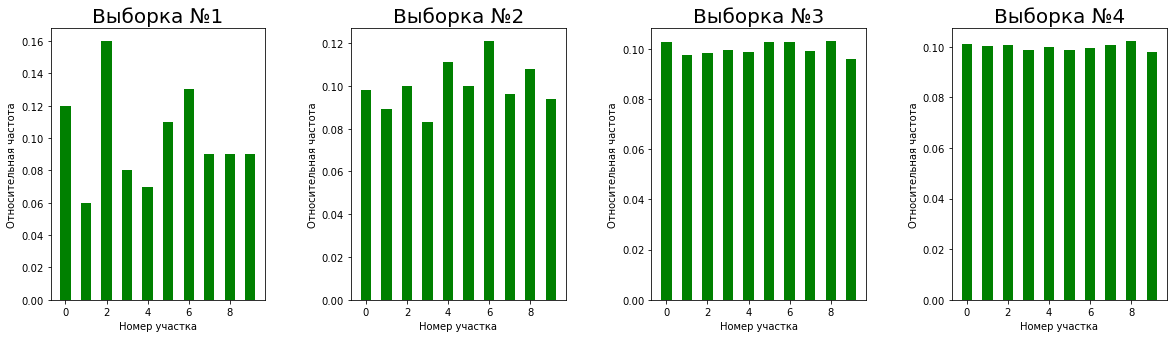

In [29]:
_, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, column in enumerate(df_relative):
    axes[i].bar(df_relative.index, df_relative[column], width=0.5, color='g')
    axes[i].set_title("Выборка №{}".format(i+1), fontsize = 20)
    axes[i].set_xlabel("Номер участка")
    axes[i].set_ylabel("Относительная частота")
plt.subplots_adjust(wspace=0.4)

In [30]:
def calc_Pearson(arr_relative, N):
    nj = np.array([1/10]*N)
    x = np.sum((nj-arr_relative)**2 / arr_relative)
    return x

In [31]:
arr_x = [calc_Pearson(df_relative[column], 10) for column in df.columns]

In [32]:
for i in range(4):
    print("Критерий Пирсона для выборки №{}:".format(i+1), arr_x[i])

Критерий Пирсона для выборки №1: 0.08152264402264404
Критерий Пирсона для выборки №2: 0.010759250771098895
Критерий Пирсона для выборки №3: 0.0005887585715413947
Критерий Пирсона для выборки №4: 0.0001512150421303158


# Задание 7

In [33]:
from random import uniform

In [34]:
sales = {}
for i, N in enumerate([10**2, 10**3, 10**4, 10**5]):
    values = [uniform(0, 10) for _ in range(N)]
    title_stb = "Выборка №{}".format(i+1)
    sales[title_stb] = pd.Series(values)
df = pd.DataFrame(data=sales)

In [35]:
arr_mean = df.mean()
arr_dispersion = df.std()**2
theor_mean = (0+10)/2
theor_dispersion = (10-0)**2/12

In [36]:
print("Математическое ожидание:\n{}\n\nДисперсия:\n{}".format(arr_mean, arr_dispersion))

Математическое ожидание:
Выборка №1    4.652934
Выборка №2    4.883901
Выборка №3    4.986451
Выборка №4    4.996911
dtype: float64

Дисперсия:
Выборка №1    8.018618
Выборка №2    8.046361
Выборка №3    8.312546
Выборка №4    8.288257
dtype: float64


In [37]:
print("Математическое ожидание и дисперсия \
теоретической равномерно распределенной случайной величиной:\n{}\n{}".format(theor_mean, theor_dispersion))

Математическое ожидание и дисперсия теоретической равномерно распределенной случайной величиной:
5.0
8.333333333333334


In [38]:
sales = {}
for i, column in enumerate(df.columns):
    sales[column] = pd.Series(calc_relativ(df[column], [0, 10], 10))
df_relative = pd.DataFrame(data=sales)

In [39]:
df_relative

,Выборка №1,Выборка №2,Выборка №3,Выборка №4
0,0.10,0.103,0.1027,0.10053
1,0.13,0.092,0.0955,0.09828
2,0.11,0.117,0.1044,0.09983
3,0.11,0.104,0.0999,0.09993
4,0.12,0.115,0.0980,0.10162
5,0.11,0.091,0.1007,0.10194
6,0.09,0.087,0.1033,0.10050
7,0.07,0.104,0.0965,0.09854
8,0.04,0.096,0.1009,0.09972
9,0.12,0.091,0.0981,0.09911


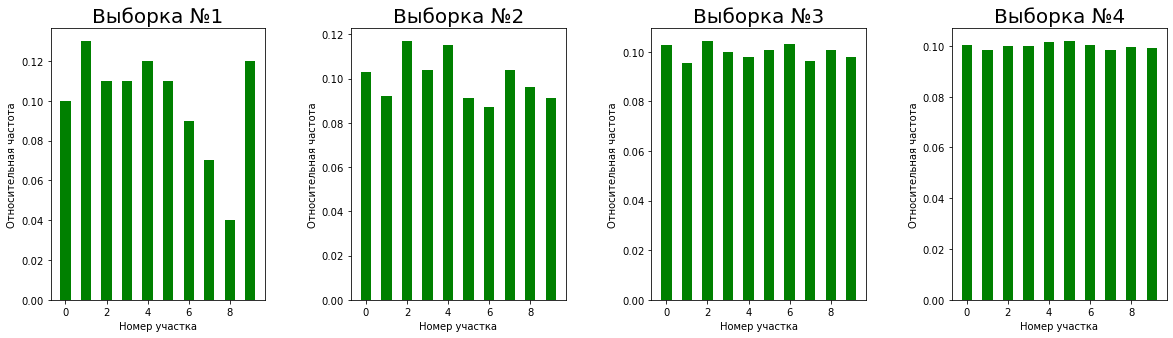

In [40]:
_, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, column in enumerate(df_relative):
    axes[i].bar(df_relative.index, df_relative[column], width=0.5, color='g')
    axes[i].set_title("Выборка №{}".format(i+1), fontsize = 20)
    axes[i].set_xlabel("Номер участка")
    axes[i].set_ylabel("Относительная частота")
plt.subplots_adjust(wspace=0.4)

In [41]:
arr_x = [calc_Pearson(df_relative[column], 10) for column in df.columns]

In [42]:
for i in range(4):
    print("Критерий Пирсона для выборки №{}:".format(i+1), arr_x[i])

Критерий Пирсона для выборки №1: 0.12028527028527028
Критерий Пирсона для выборки №2: 0.009406745514116592
Критерий Пирсона для выборки №3: 0.0007914393533546076
Критерий Пирсона для выборки №4: 0.00012887756709708745
